In [1]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# These libs are to read an image from a URL:
import requests
from io import BytesIO
from PIL import Image

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


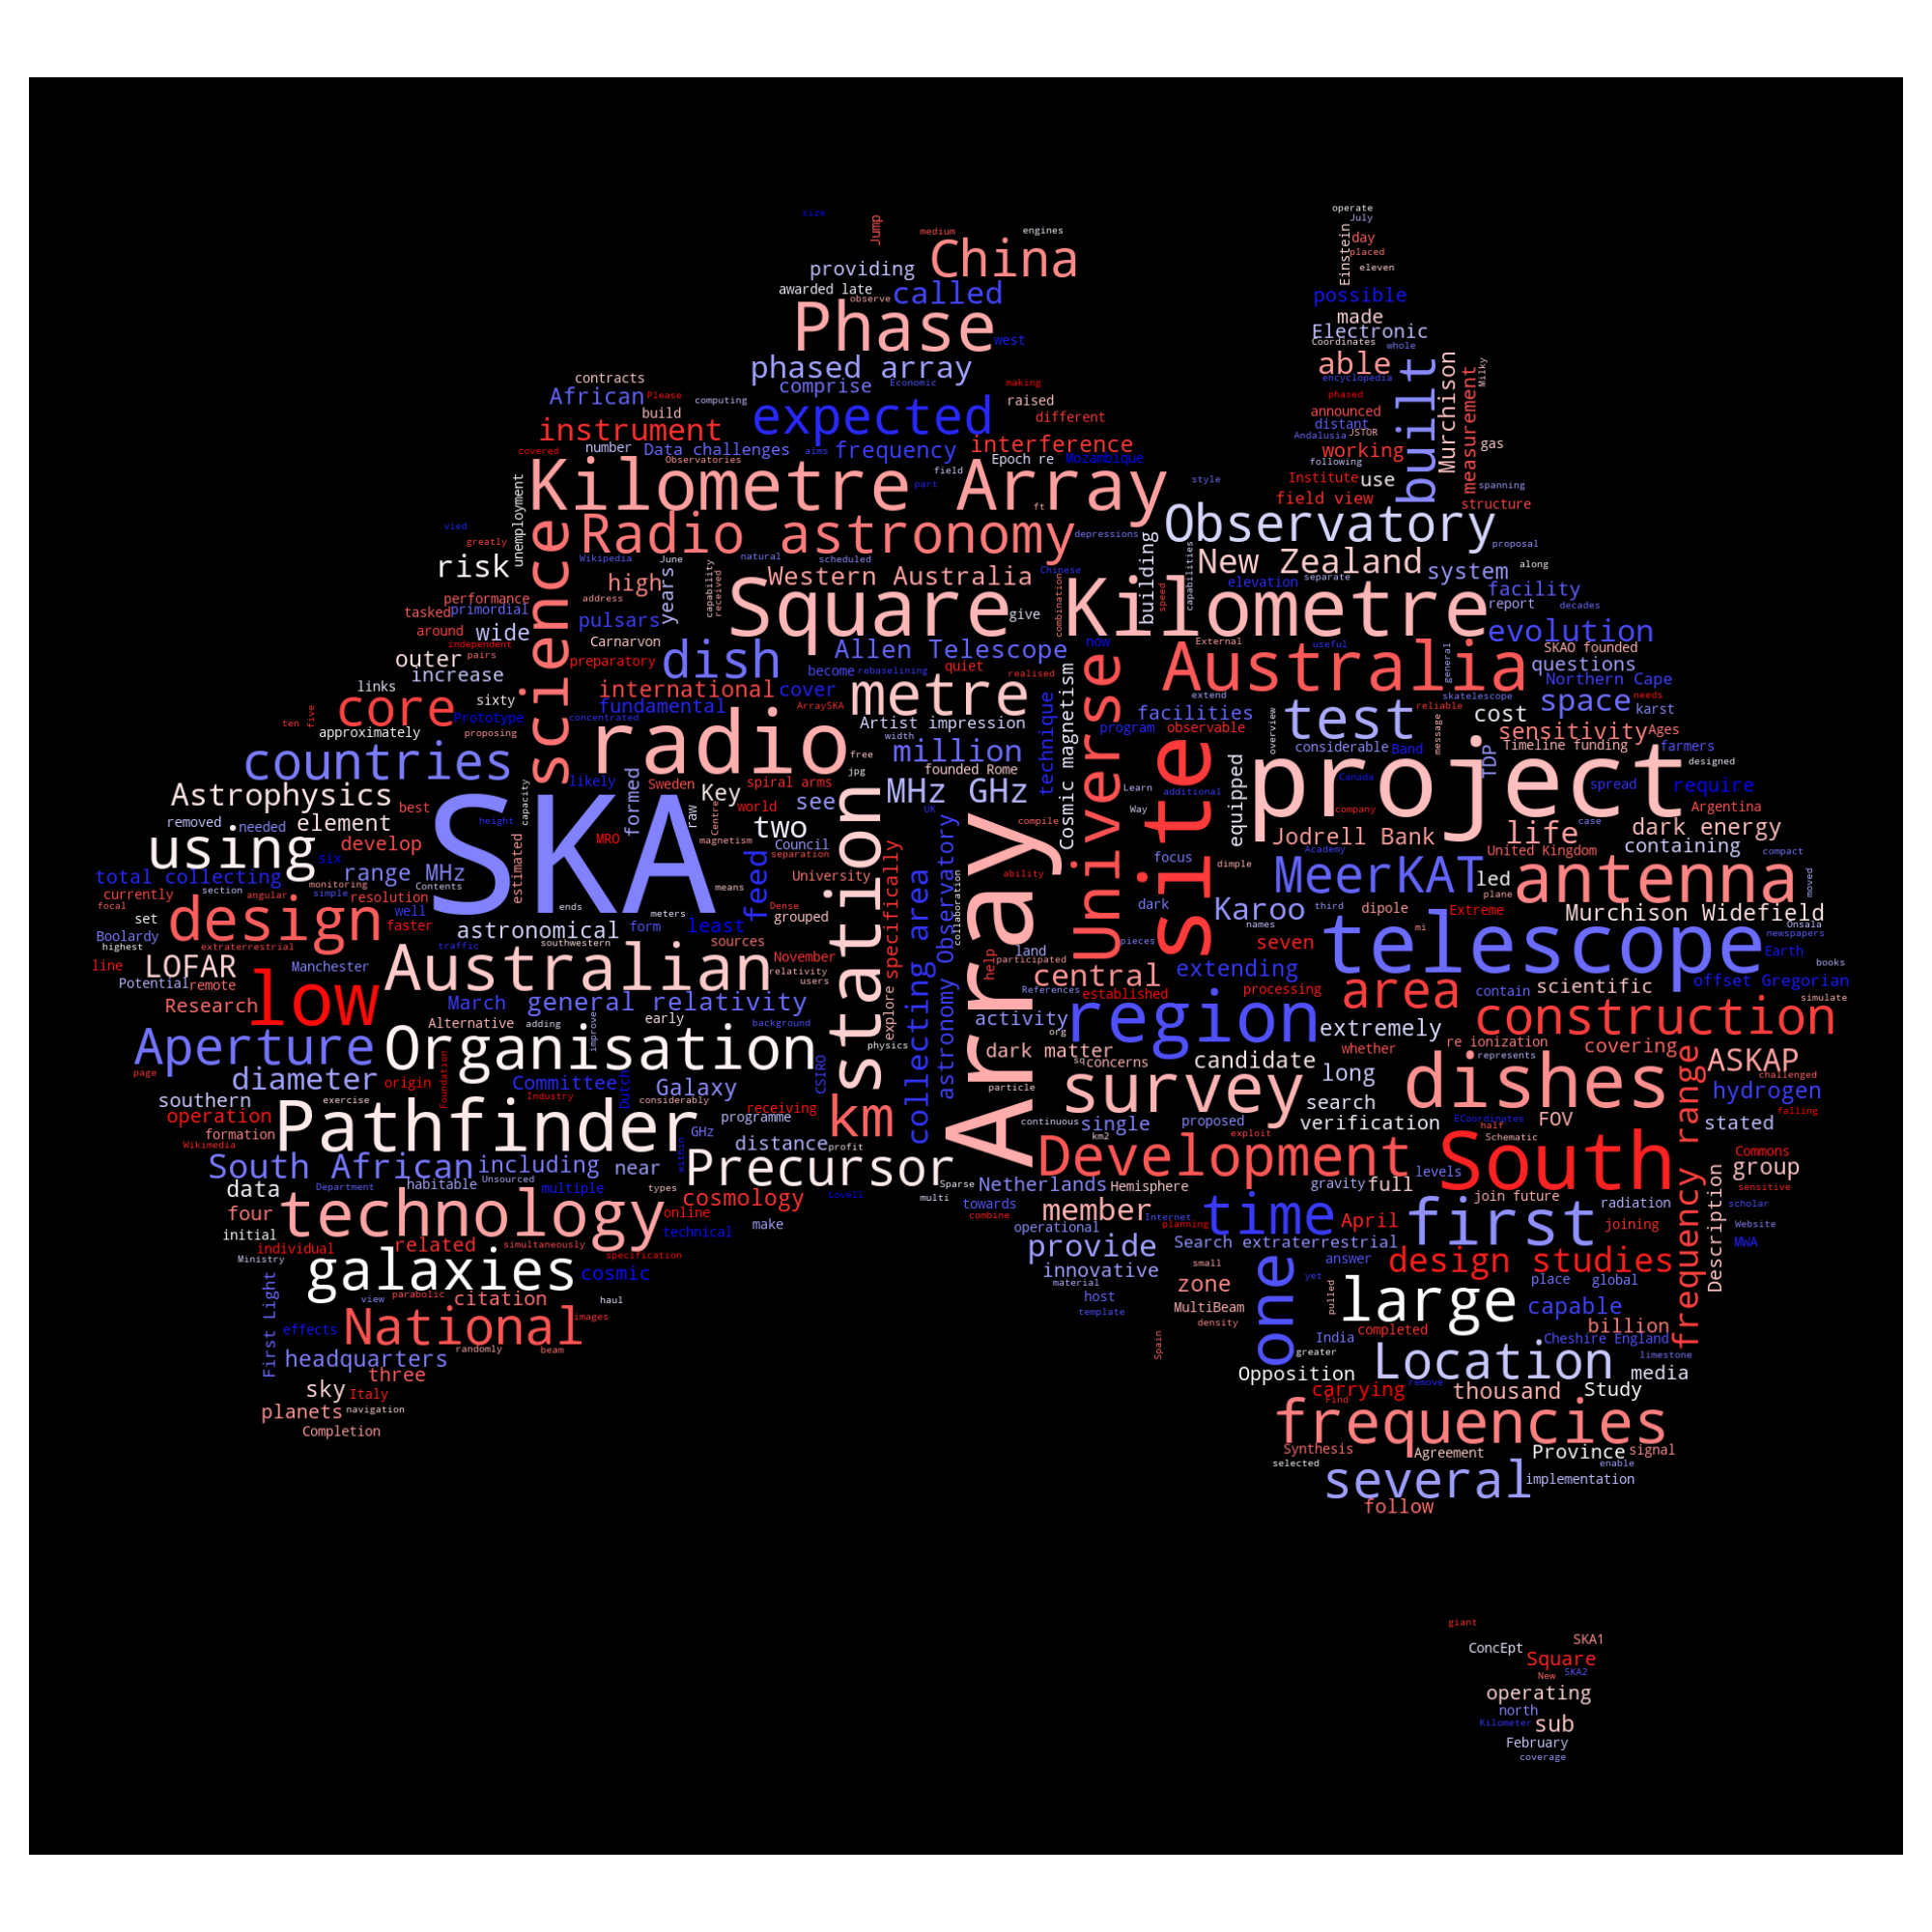

In [17]:
# Preparing the background image. Here it is just a B/W map of Australia:
response = requests.get('https://i2.wp.com/ausrecord.com/wp-content/uploads/2018/08/australia-map-clipart.jpg?ssl=1')
#response = requests.get('http://chandra.harvard.edu/graphics/resources/illustrations/chandra_trw_300.jpg')
img = Image.open(BytesIO(response.content))
mask = np.array(img)

# The text to generate a word cloud based on. Here it is the Wikipedia article for SKA:
# I was too lazy to properly read/format it, just copied the text from the whole page and pasted it into a text file.
text = open('/home/arash/Dropbox/ska.txt').read()

# Words to exclude in the word cloud. It has a built-in library, you can add to that.
# I ran it a few times and added some manually.
stopwords = set(STOPWORDS)
for word in ['will', 'Africa','Wikidata','bid','article','main','edit','mid','may','located']:
    stopwords.add(word)

wordcloud = WordCloud(colormap='bwr', stopwords=stopwords, contour_width=3, contour_color='black',
                      background_color='black', mask=mask, max_words=500,random_state=454).generate(text)

# Now passing it to matplotlib and saving it:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig('SKA_australia_wordcloud.jpg',dpi=1000)